In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define the image size
IMG_SIZE = 224

# Define the dataset directory and labels
DATASET_DIR = "/content/drive/MyDrive/osteoarthritis"
LABELS = ["normal", "osteoarthritis"]

# Load the images and labels
data = []
labels = []
for label in LABELS:
    label_dir = os.path.join(DATASET_DIR, label)
    for image_file in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_file)
        image = Image.open(image_path).resize((IMG_SIZE, IMG_SIZE))
        image = np.array(image) / 255.0
        data.append(image)
        labels.append(label)

# Split the dataset into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Convert the dataset to TensorFlow tensors
x_train = tf.convert_to_tensor(x_train)
x_val = tf.convert_to_tensor(x_val)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_val = tf.convert_to_tensor(y_val)
y_test = tf.convert_to_tensor(y_test)


FileNotFoundError: ignored

In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/osteoarthritis/train'
test_path = '/content/drive/MyDrive/osteoarthritis/test'
     

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

Working with 173 images
Image examples: 
9861493R.png


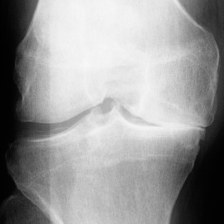

9475286R.png


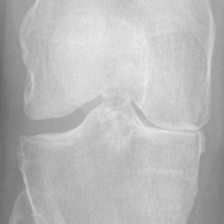

9225592L.png


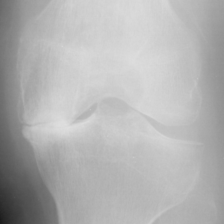

9797352L.png


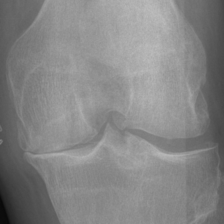

9613488L.png


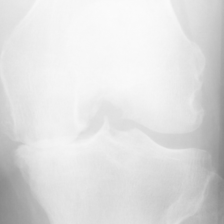

9526396L.png


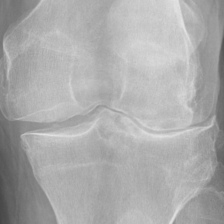

9095103L.png


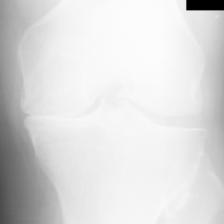

9732751R.png


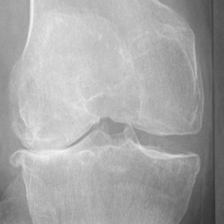

9912946L.png


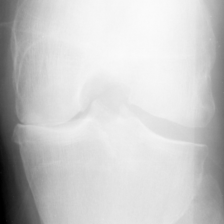

9257048L.png


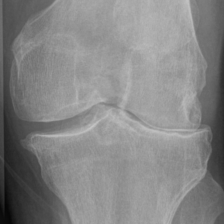

In [ ]:
folder = train_path+'/4_severe'


onlyseverefiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyseverefiles)))
print("Image examples: ")


for i in range(10):
    print(onlyseverefiles[i])
    display(_Imgdis(filename=folder + "/" + onlyseverefiles[i], width=240, height=240))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:

vgg.input
     

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False
     

In [ ]:
folders = glob('/content/drive/MyDrive/osteoarthritis/train/*')
print(len(folders))

5


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
     

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
     

Found 5781 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
     

Found 1656 images belonging to 5 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)
     

<ipython-input-17-c28fe7da220e>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10

Epoch 1: val_loss improved from inf to 1.87780, saving model to mymodel.h5
5/5 - 819s - loss: 2.5513 - accuracy: 0.2500 - val_loss: 1.8778 - val_accuracy: 0.2627 - 819s/epoch - 164s/step
Epoch 2/10

Epoch 2: val_loss did not improve from 1.87780
5/5 - 364s - loss: 2.2251 - accuracy: 0.2500 - val_loss: 1.8912 - val_accuracy: 0.3428 - 364s/epoch - 73s/step
Epoch 3/10

Epoch 3: val_loss improved from 1.87780 to 1.84223, saving model to mymodel.h5
5/5 - 203s - loss: 1.9330 - accuracy: 0.3313 - val_loss: 1.8422 - val_accuracy: 0.3662 - 203s/epoch - 41s/step
Epoch 4/10

Epoch 4: val_loss improved from 1.84223 to 1.72206, saving model to mymodel.h5
5/5 - 176s - loss: 1.7611 - accuracy: 0.3375 - val_loss: 1.7221 - val_accuracy: 0.3330 - 176s/epoch - 35s/step
Epoch 5/10

Epoch 5: val_loss improved from 1.72206 to 1.41677, saving model to mymodel.h5
5/5 - 135s - loss: 1.5312 - accuracy: 0.3625 - val_loss: 1.4168 - val_accuracy: 0.2803 - 135s/epoch - 27s/step
Epoch 6/10

Epoch 6: val_

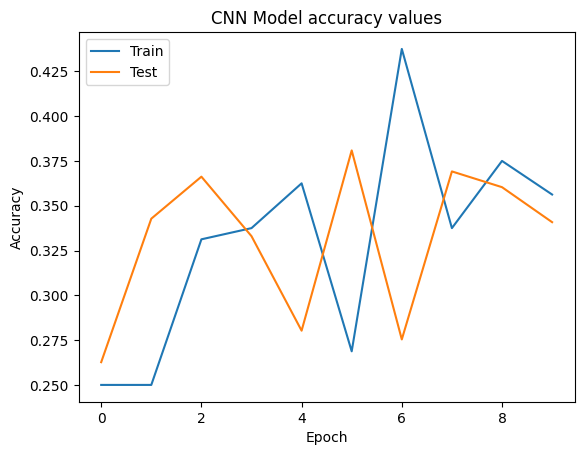

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()